<a href="https://colab.research.google.com/github/debscotis/debscotis/blob/main/Monitoramento_CPU_Memoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uso da CPU: 10.2%
Uso de memória: 9.7%
Uso de disco: 34.0%
PID: 1, Nome: docker-init
PID: 7, Nome: node
PID: 16, Nome: oom_monitor.sh
PID: 18, Nome: run.sh
PID: 20, Nome: kernel_manager_proxy
PID: 32, Nome: tail
PID: 47, Nome: tail
PID: 78, Nome: python3
PID: 79, Nome: colab-fileshim.
PID: 96, Nome: jupyter-noteboo
PID: 97, Nome: dap_multiplexer
PID: 313, Nome: python3
PID: 352, Nome: python3
PID: 382, Nome: language_service
PID: 394, Nome: node
PID: 2136, Nome: sleep
Nome: docker-init, Status: sleeping


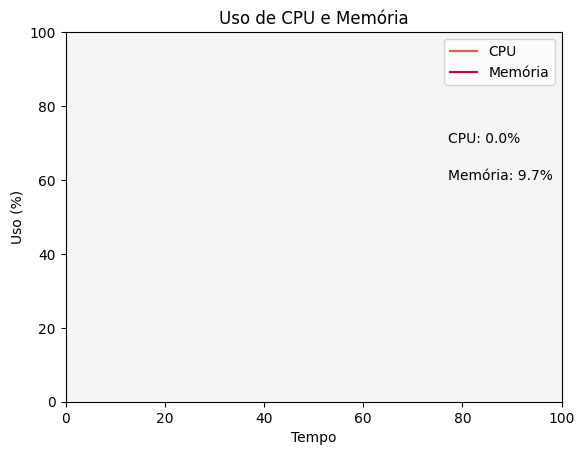

In [7]:
import psutil
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# obter informações de uso da CPU
cpu_percent = psutil.cpu_percent()
print(f"Uso da CPU: {cpu_percent}%")

# obter informações de uso de memória
memory = psutil.virtual_memory()
print(f"Uso de memória: {memory.percent}%")

# obter informações de uso de disco
disk_usage = psutil.disk_usage("/")
print(f"Uso de disco: {disk_usage.percent}%")

# obter lista de processos
processes = psutil.process_iter()
for process in processes:
    print(f"PID: {process.pid}, Nome: {process.name()}")

# obter informações de um processo específico
process = psutil.Process(1)  # PID 1 é o processo init no Linux
print(f"Nome: {process.name()}, Status: {process.status()}")

# Configura o gráfico
fig, ax = plt.subplots()
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
ax.set_title('Uso de CPU e Memória')
ax.set_xlabel('Tempo')
ax.set_ylabel('Uso (%)')
cpu_line, = ax.plot([], [], label='CPU', color='#FF5733')
mem_line, = ax.plot([], [], label='Memória', color='#C70039')
ax.legend()

# Adiciona textos aos valores da CPU e Memória
cpu_text = ax.text(0.77, 0.7, '', transform=ax.transAxes)
mem_text = ax.text(0.77, 0.6, '', transform=ax.transAxes)

# Função de atualização do gráfico
def update_chart(frame):
    # Obtém informações de uso da CPU
    cpu_percent = psutil.cpu_percent()

    # Obtém informações de uso da memória
    memory = psutil.virtual_memory()
    memory_percent = memory.percent

    # Adiciona os dados ao gráfico
    cpu_line.set_data(list(range(frame)), [cpu_percent]*frame)
    mem_line.set_data(list(range(frame)), [memory_percent]*frame)

    # Atualiza os textos com os valores da CPU e Memória
    cpu_text.set_text(f'CPU: {cpu_percent:.1f}%')
    mem_text.set_text(f'Memória: {memory_percent:.1f}%')

    return cpu_line, mem_line, cpu_text, mem_text

# Anima o gráfico
animation = FuncAnimation(fig, update_chart, frames=100, interval=1000, blit=True)

# Estiliza as linhas do gráfico
for line in [cpu_line, mem_line]:
    line.set_linewidth(2)
    line.set_marker('o')
    line.set_markersize(5)

# Estiliza o fundo do gráfico
ax.set_facecolor('#F5F5F5')

# Mostra o gráfico
plt.show()